# PART 1/3: INSTALLATIONS
# MMM 2025 - 12.3.2025
## Daniele Passerone


This first part of the exercise has to do with preliminary installations that are needed to run the exercise.

Unless it is already there, we install the app "On surface chemistry", from the home page of our AiiDAlab teaching, App Store

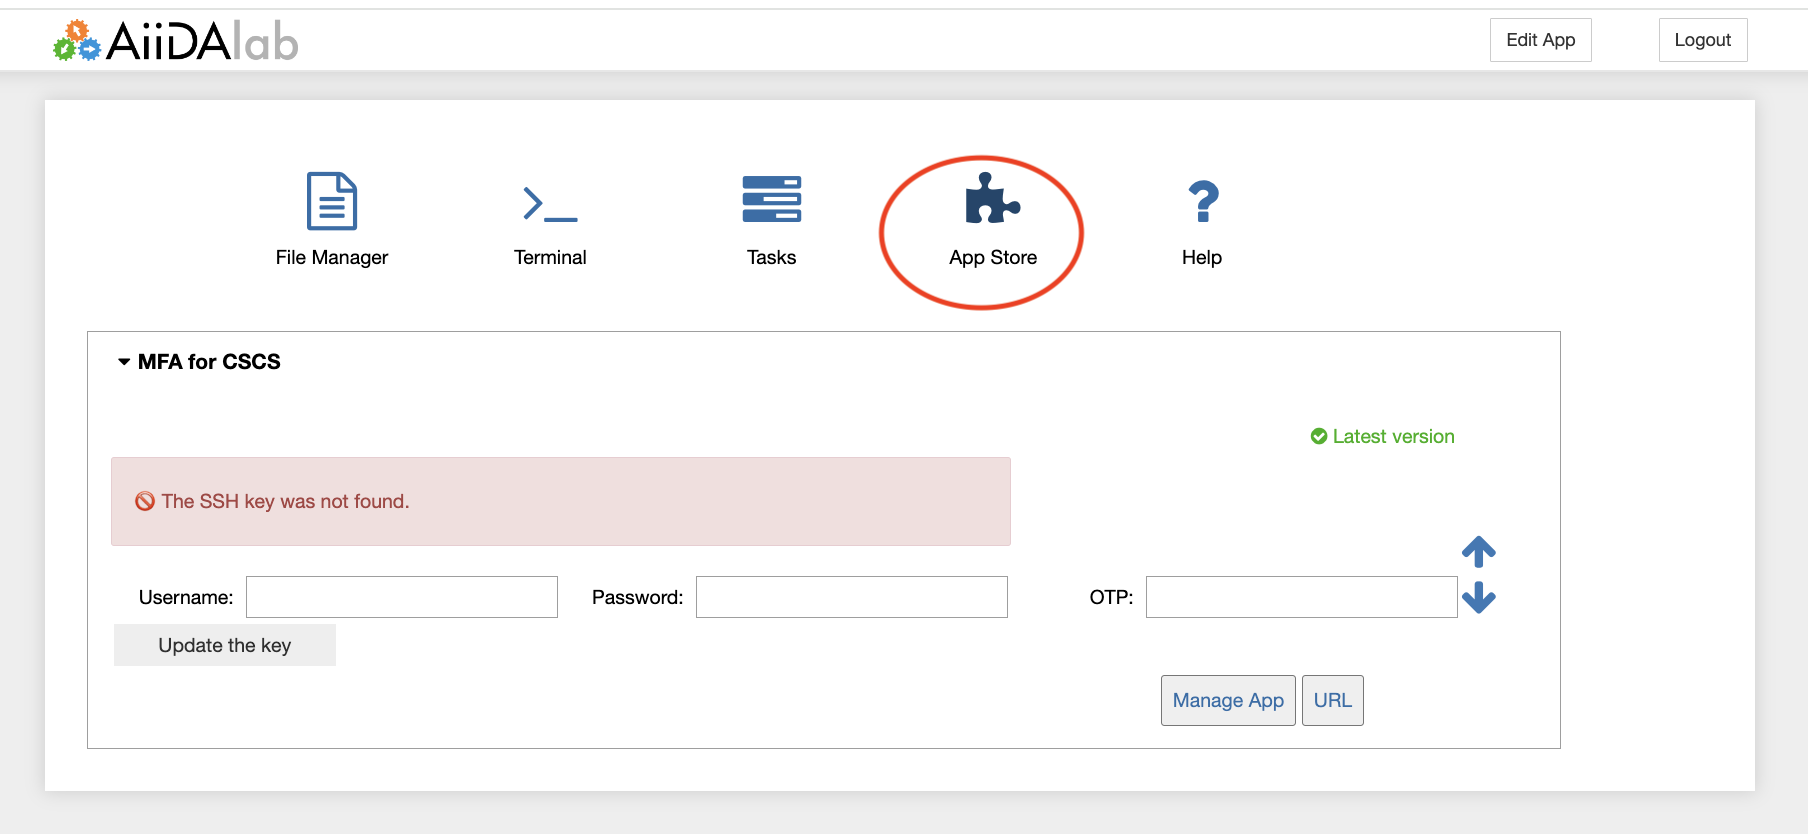

On the second page, we find this app,

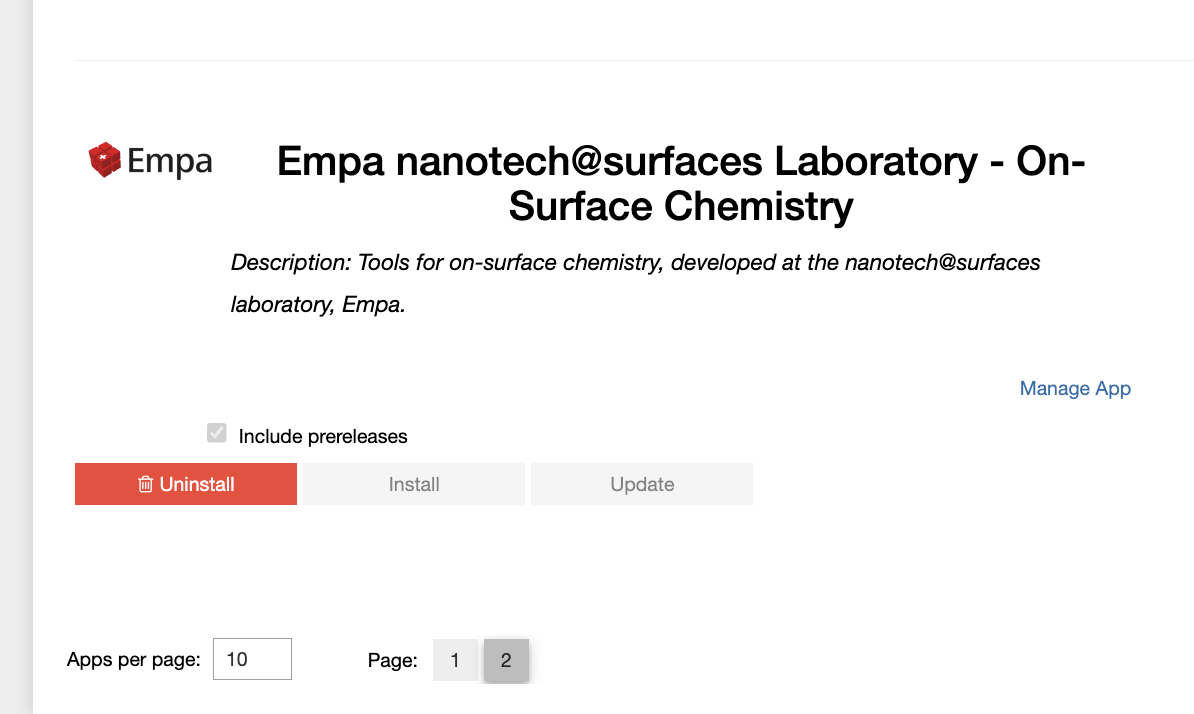

and we select "Include prereleases" and then install the last proposed version, it will take some minutes.

Coming back on the home page **AFTER THE GEAR ON THE TOP RIGHT HAS STOP TURNING**, we will see the following situation

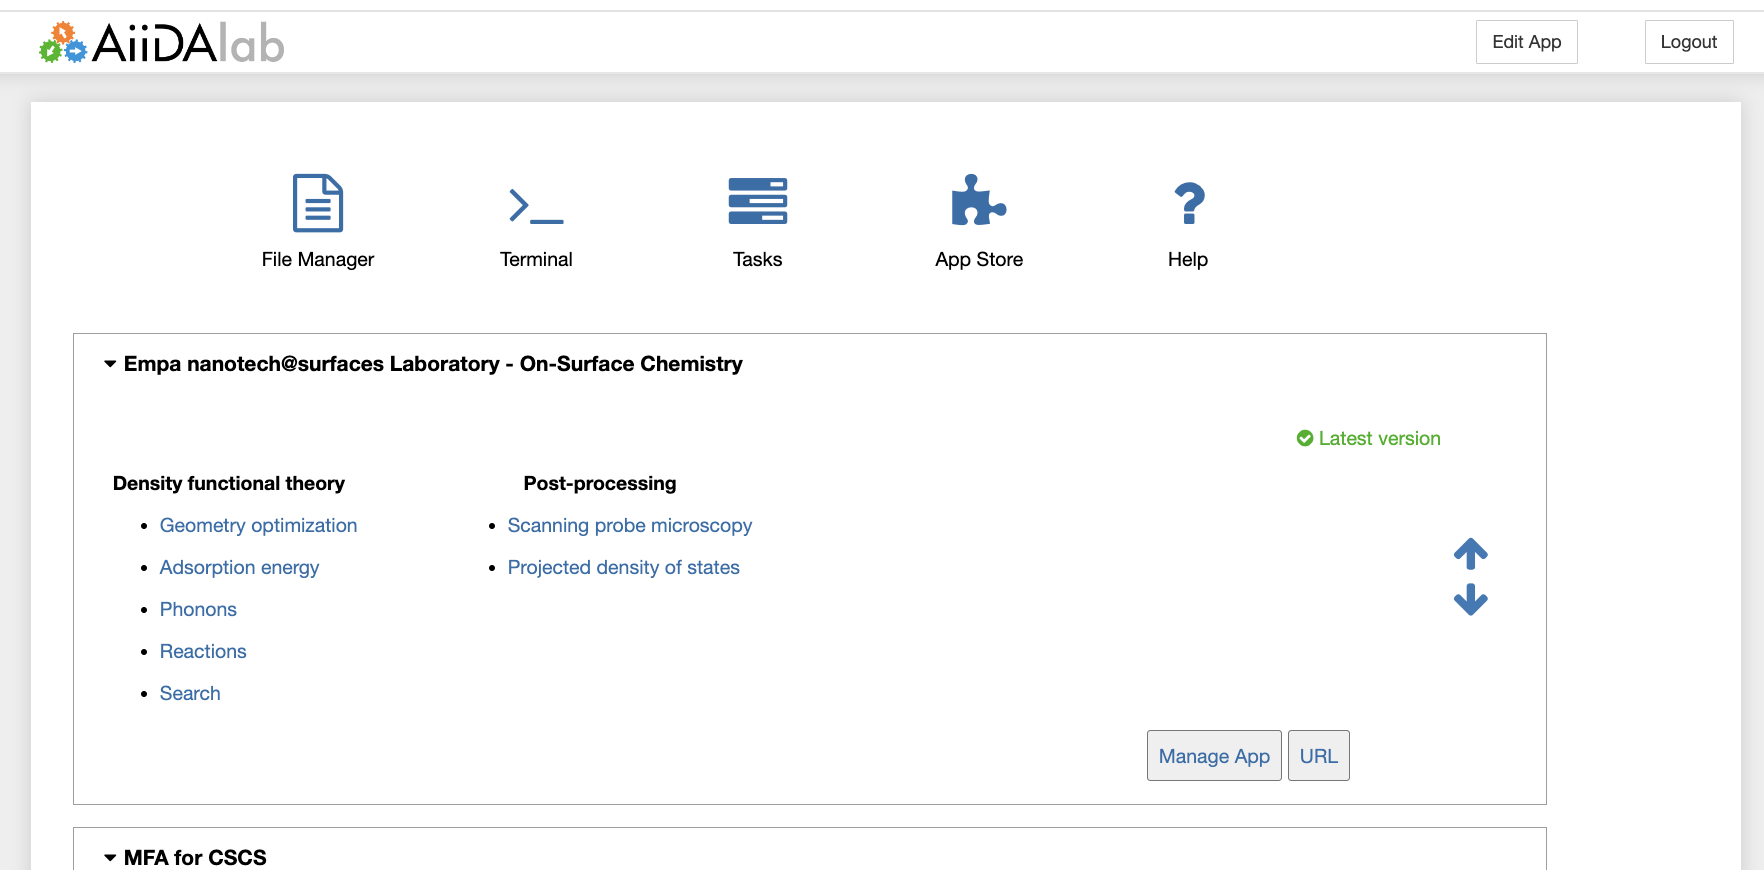

# PART 2/3: RUNNING AND CONTROLLING AN AIIDALAB WORKCHAIN
# MMM 2025 - 12.3.2025
## Daniele Passerone


This second part of the exercise will teach you how to run a geometry optimization or an orbital/stm calculation with AiiDAlab. Execute the following cell:

In [1]:
#
# Imports to run the AiiDAlab commands within jupyter 

%load_ext aiida
%aiida

!cp /opt/install/bin/cp2k-* /home/jovyan/.local/bin/ # this is important command 

## Learning to launch a simulations: C2H2 molecule. 

Go to the AiiDAlab home page (clicking on the logo top left with the right mouse button, open a new tab), and select to start a geometry optimization:
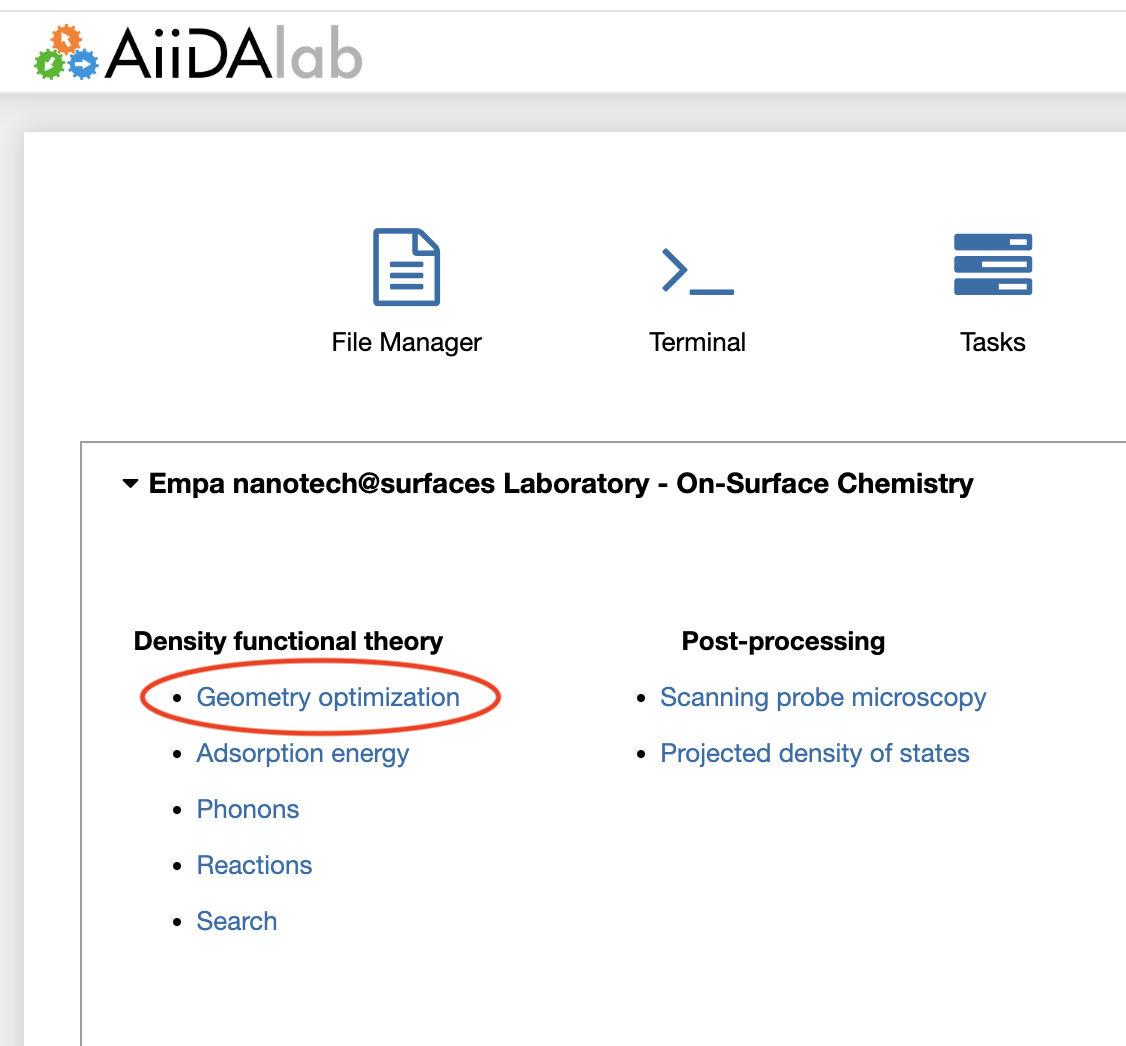

You will land on a page similar to this, and you can import the structure. We select: **FROM SMILES**
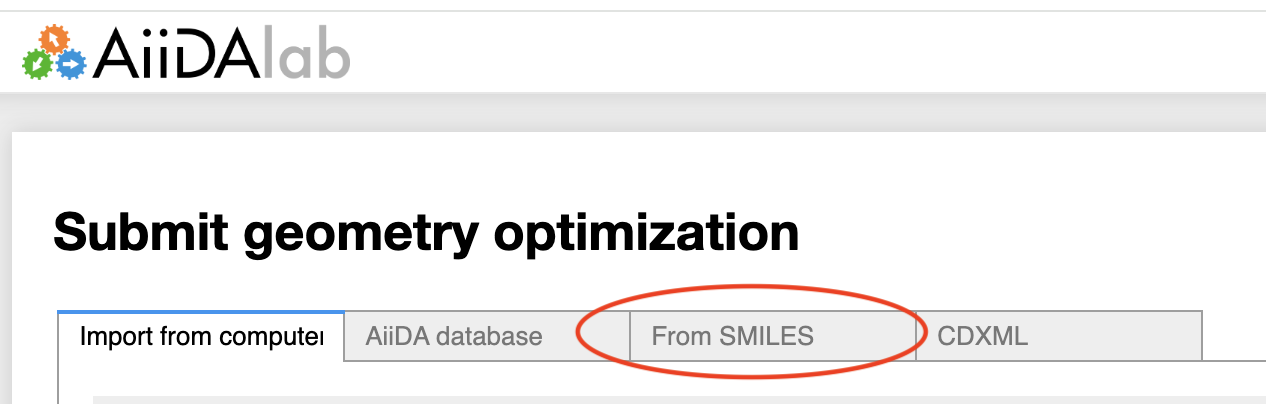

Now, on google it is easy to find the SMILES of a given molecule. SMILES is the “Simplified Molecular Input Line Entry System,” which is used to translate a chemical's three-dimensional structure into a string of symbols that is easily understood by computer software. In general, hydrogen atoms are derived from simple rules (carbon has four bonds, oxygen two bonds, nitrogen three bonds). In the case of  **C2H2** the SMILE is as simple as **C#C** (triple bond) and 
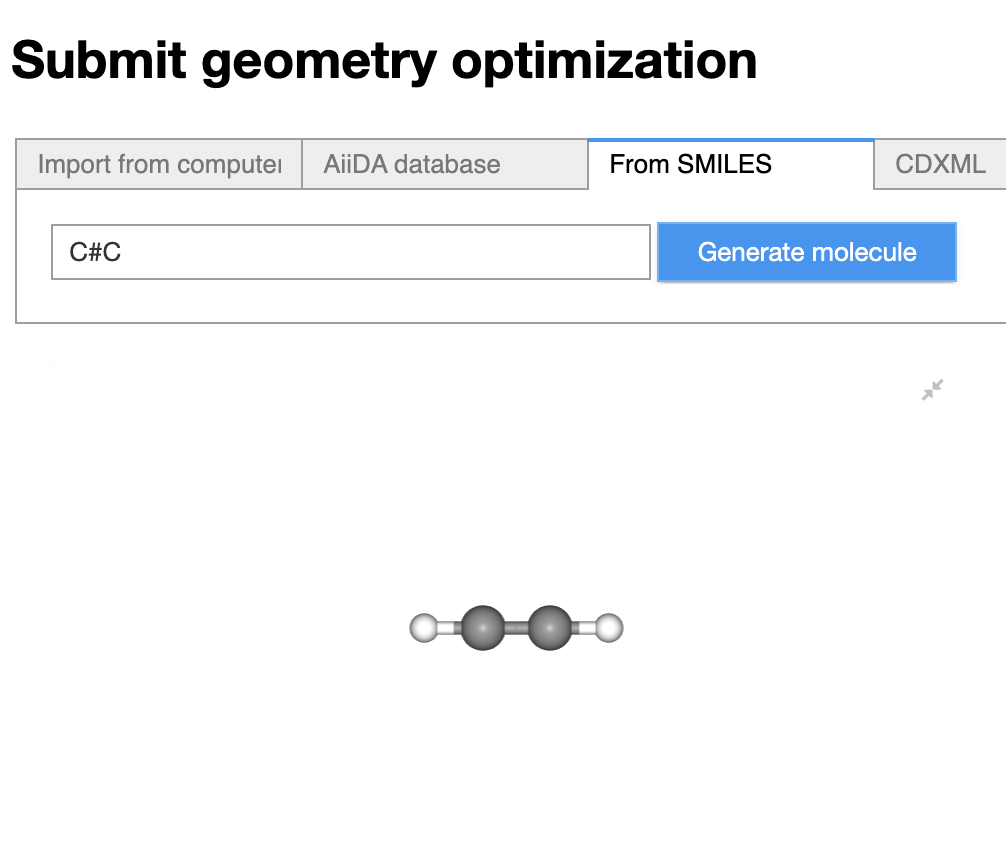

**GENERATE MOLECULE** will show our acetylene, already in a good shape. 


To add some interest, we learn how to modify the structure by hand, clicking "edit structure"

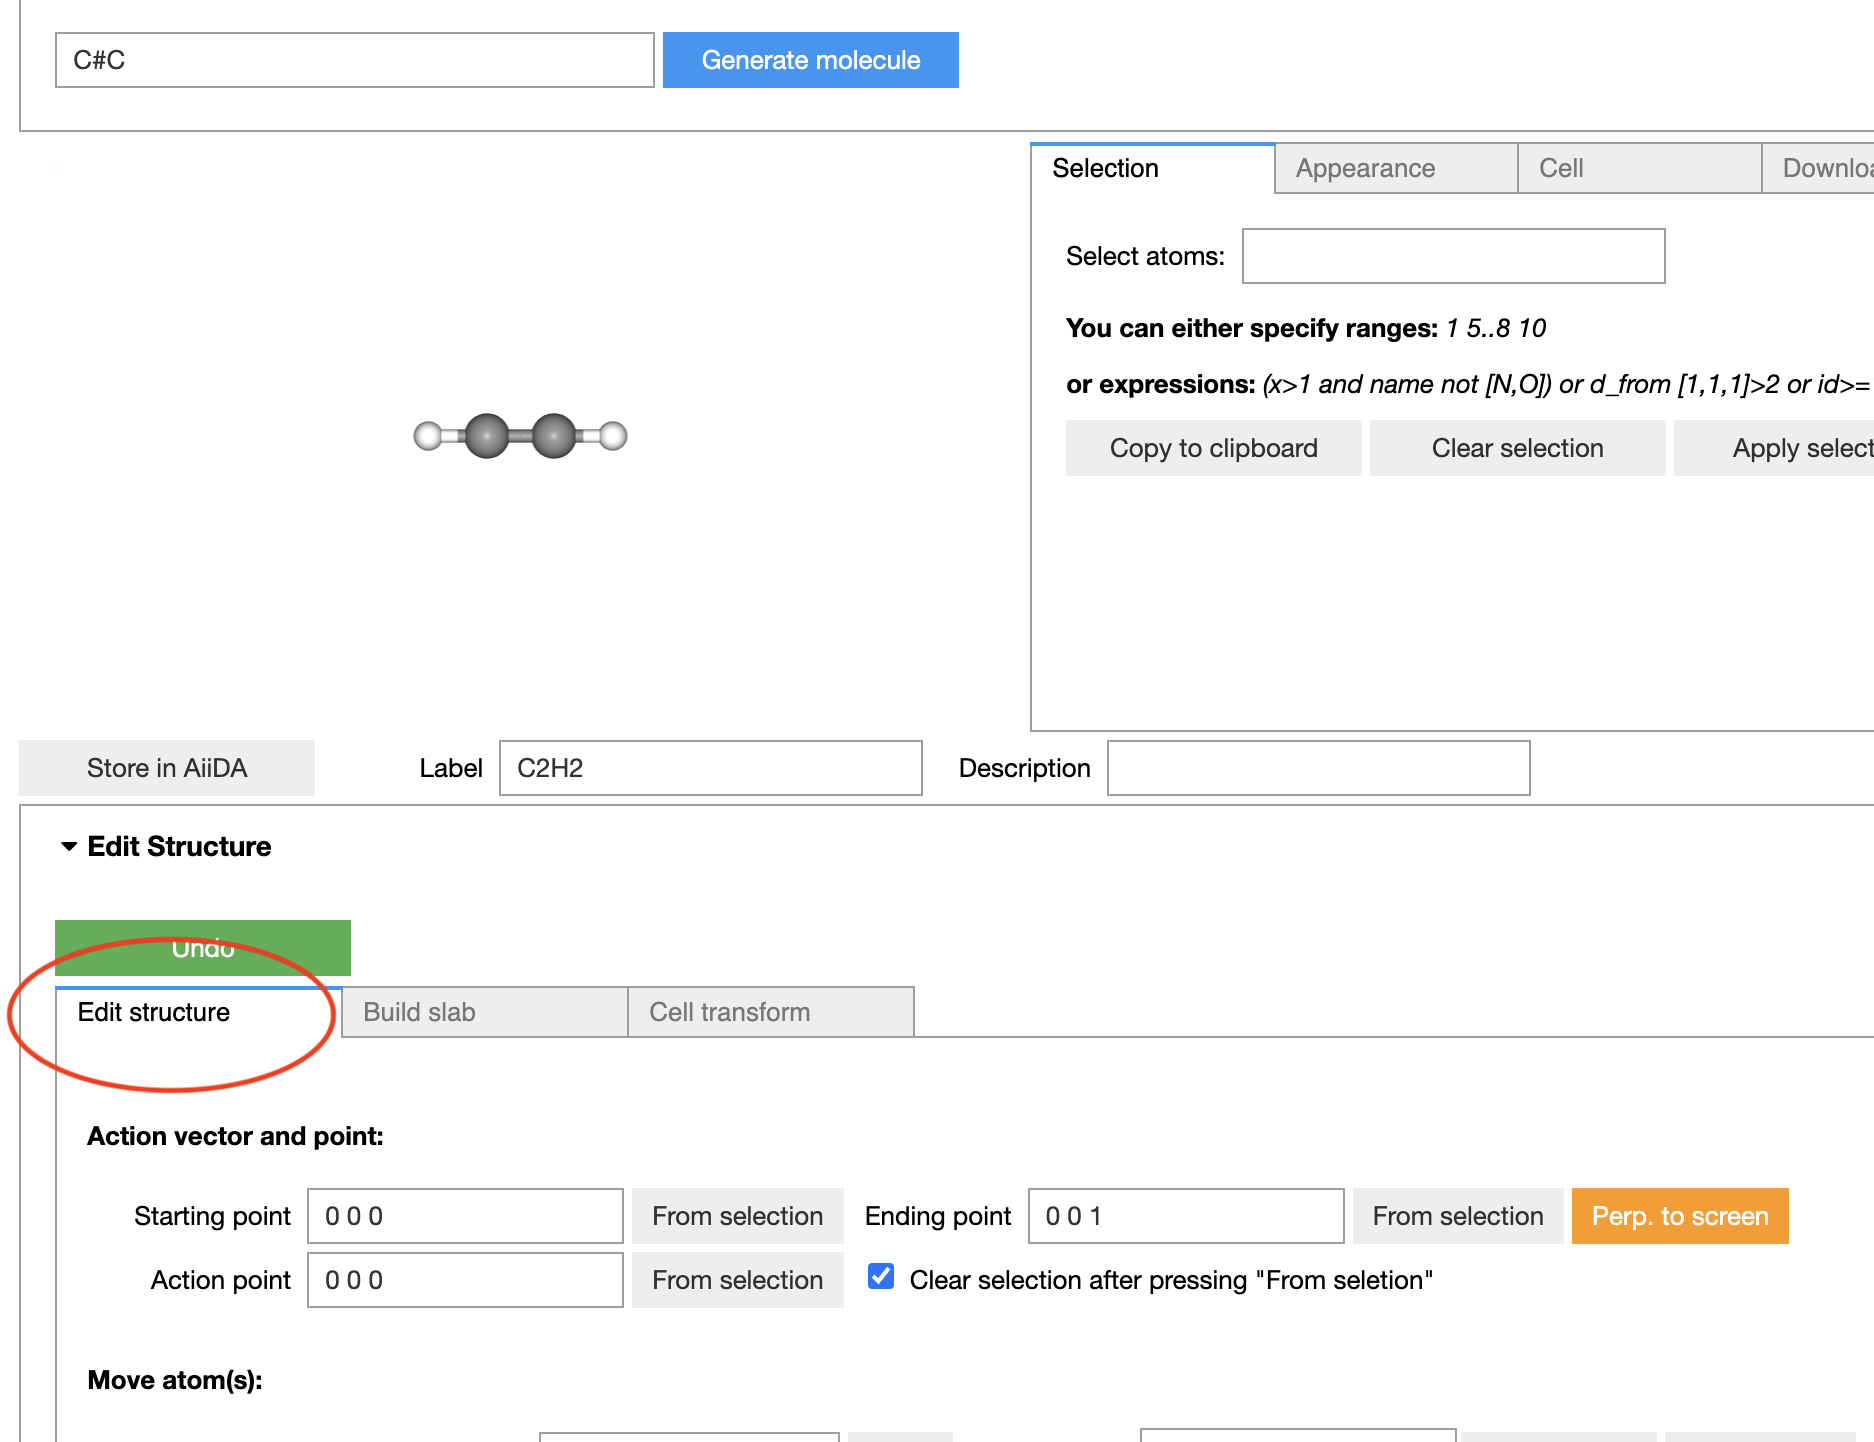

and then we move the right CH group a bit to the right. We first define a line along which we move some selected atoms. Click on one "C" (green) then "Action vector", "Starting point", "From selection" 
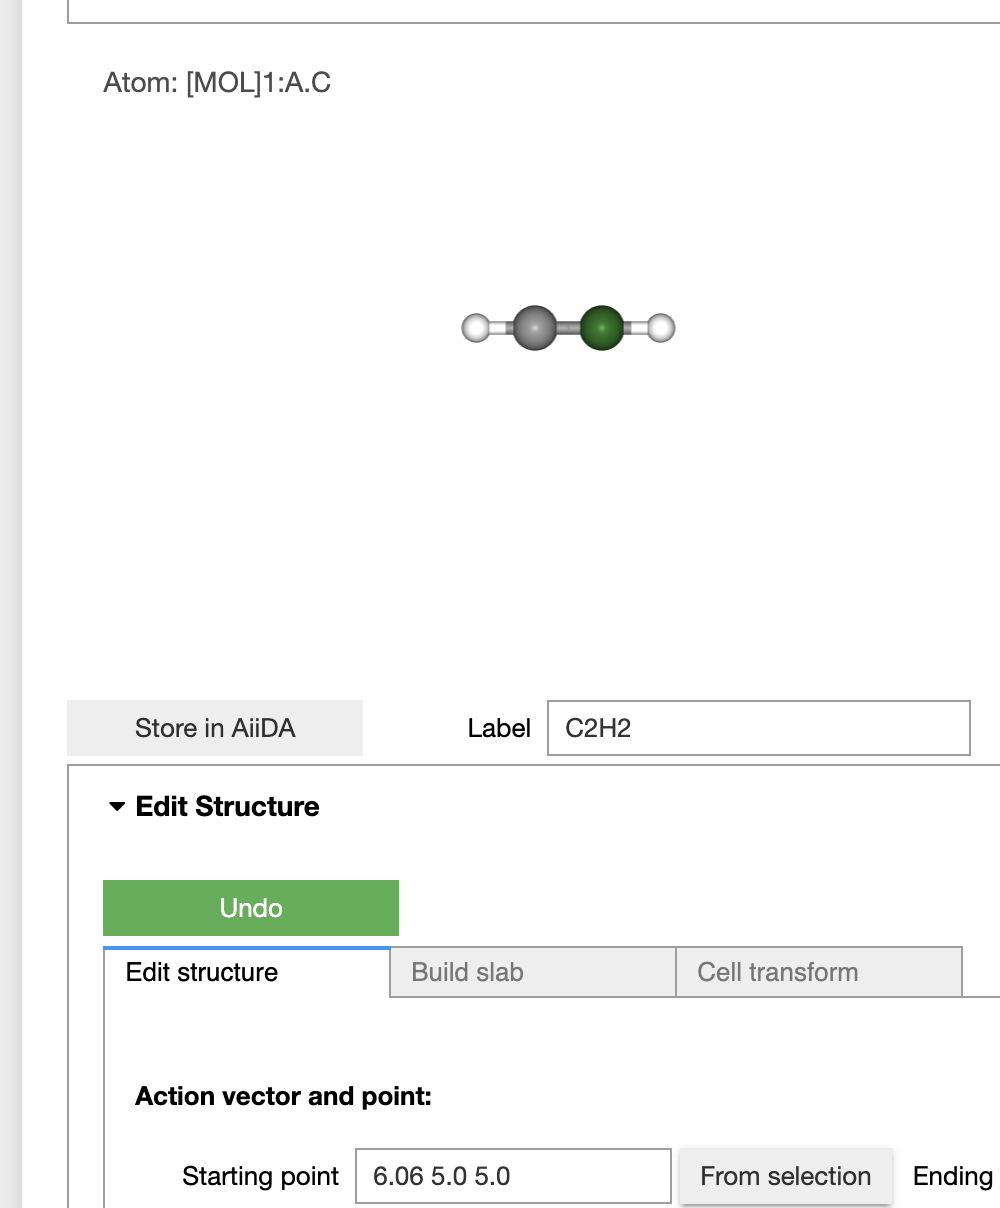

then click on the H to the right, then "Ending point", "From selection".
Now your action vector is defined. 
Select both atoms one after the other, and then "Move along action vector by" and choose a displacement (in Angstrom)
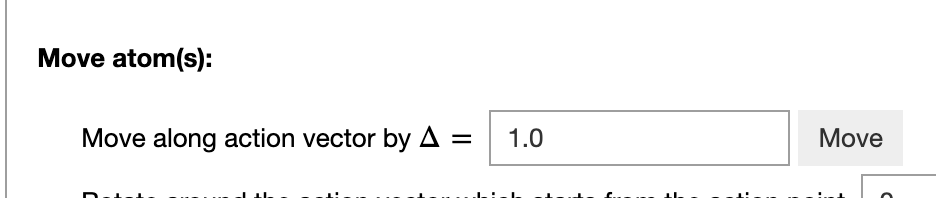

Now your molecule is deformed.


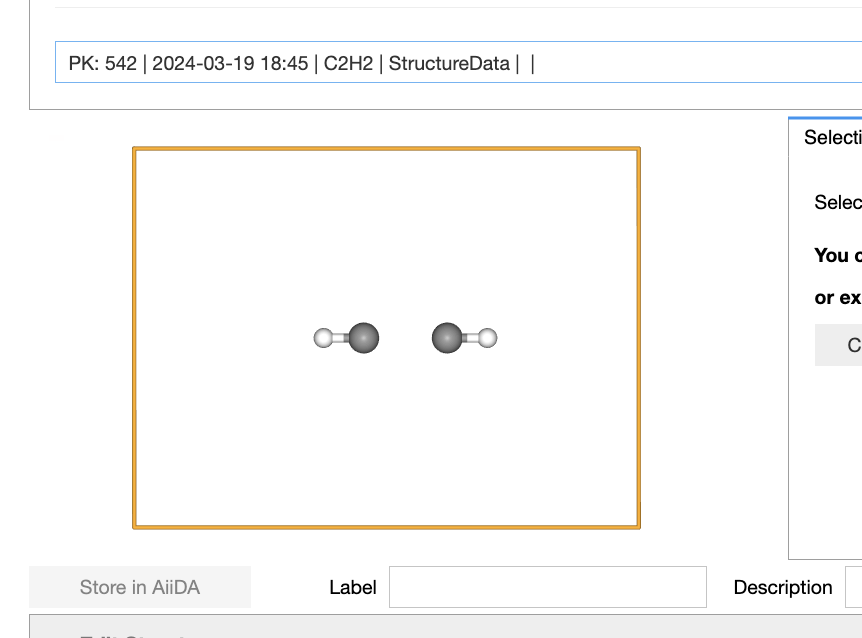



We now give some parameters:
1. Keep periodic to reduce computational cost
2. Include van der Waals dispersion corrections
3. Low accuracy to loosen the convergence threshold
4. The code we use (cp2k)
5. Only one node, one core (very important!!!)
6. A name

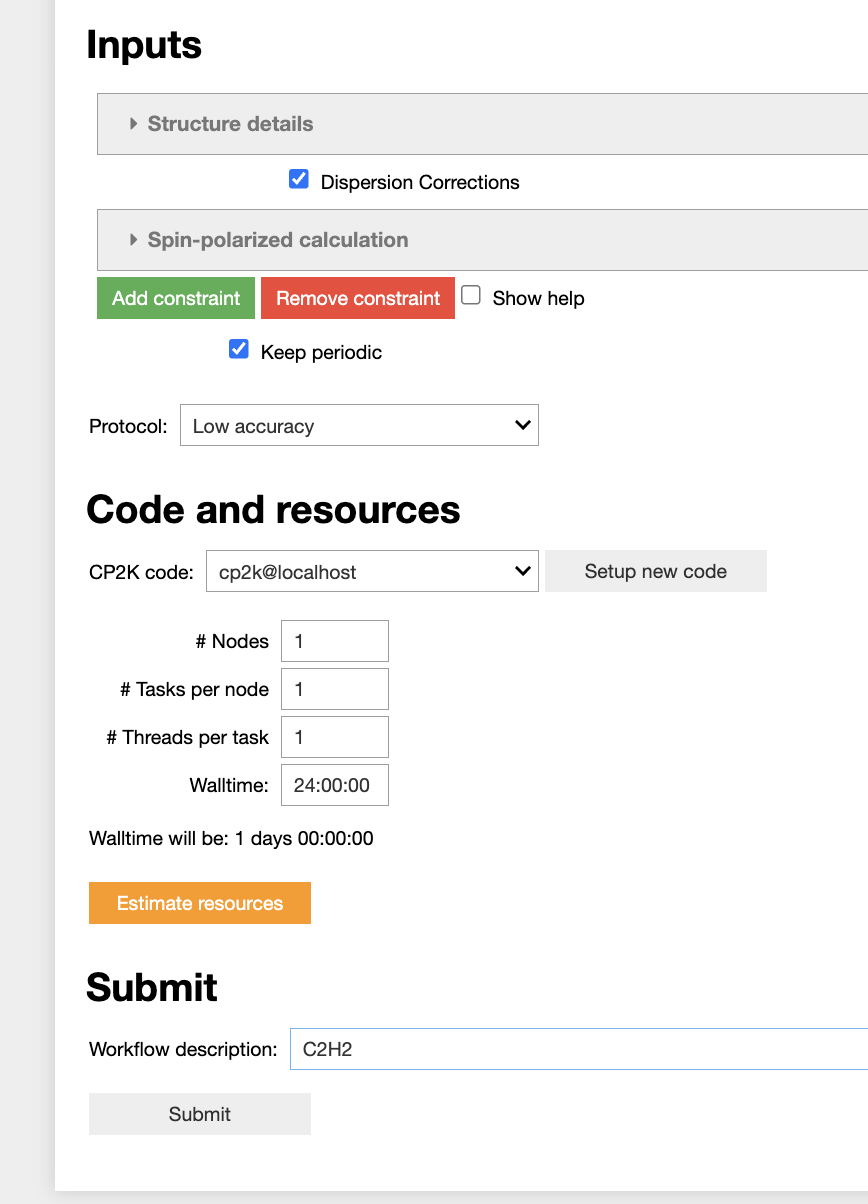

### FINALLY, WE SUBMIT THE SIMULATION (SUBMIT) ###

## Controlling the simulation from the jupyter

Now the simulation is running. From the terminal (OR FROM THIS NOTEBOOK, INDIVIDUALLY) we can give the command

In [33]:
verdi process list -a

  PK  Created    Process label                     ♻    Process State    Process status
----  ---------  --------------------------------  ---  ---------------  ----------------
 703  14h ago    Cp2kGeoOptWorkChain                    ⏹ Finished [0]
 711  14h ago    Cp2kBaseWorkChain                      ⏹ Finished [0]
 712  14h ago    Cp2kCalculation                        ⏹ Finished [0]
 718  14h ago    merge_trajectory_data_non_unique       ⏹ Finished [0]
 723  14h ago    Cp2kOrbitalsWorkChain                  ⏹ Finished [0]
 727  14h ago    Cp2kDiagWorkChain                      ⏹ Finished [0]
 734  14h ago    Cp2kBaseWorkChain                      ⏹ Finished [0]
 735  14h ago    Cp2kCalculation                        ⏹ Finished [0]
 743  14h ago    Cp2kBaseWorkChain                      ⏹ Finished [0]
 744  14h ago    Cp2kCalculation                        ⏹ Finished [0]
 749  14h ago    StmCalculation                         ⏹ Finished [0]

Total results: 11

Report: ♻ Processes m

and follow if the simulation is running. 
We will see something like that:

     504  20s ago    Cp2kGeoOptWorkChain               ⏵ Waiting         Waiting for child processes: 512
     512  19s ago    Cp2kBaseWorkChain                 ⏵ Waiting         Waiting for child processes: 513
     513  19s ago    Cp2kCalculation                   ⏵ Waiting         Monitoring scheduler: job state RUNNING

    Total results: 110

    Report: last time an entry changed state: 19s ago (at 18:19:48 on 2024-03-19)
    Report: Checking daemon load... OK
    Report: Using 2% of the available daemon worker slots.
    (base) jovyan@4491cdac9486:~/MMM_2024/Exercise_5$

We look for the number (pk) of the Cp2kCalculation, the last line (most recent). We can access the supercomputer (in this case: the same computer you are working on with AiiDAlab, your laptop) by going to a **terminal** and giving the command:

    verdi calcjob gotocomputer 145
    
    


This will lead us to the "remote directory" and we can have a look at the running output files. Type

    exit

to go back to the original shell. 
At the end of the geometry optimization (5-10 minutes), our 

    verdi process list -a 
    
(either in the jupyter or on the Terminal) will show an output like:

     504  4m ago     Cp2kGeoOptWorkChain               ⏹ Finished [0]
     512  4m ago     Cp2kBaseWorkChain                 ⏹ Finished [0]
     513  4m ago     Cp2kCalculation                   ⏹ Finished [0]
     519  1m ago     merge_trajectory_data_non_unique  ⏹ Finished [0]
     
indicating that the Geometry optimization workchain is finished. 
Hitting "search" from the home page

will lead us to a page with all finished calculations, that we can then investigate individually:


Note that a lot of data of the simulation are kept in the database. For example, the **cp2k calculation** retains the input and the output, that we can access from the command line **but as a shell command (with !) **

In [5]:
verdi process list -a

  PK  Created    Process label                     ♻    Process State    Process status
----  ---------  --------------------------------  ---  ---------------  ----------------
  38  14m ago    Cp2kGeoOptWorkChain                    ⏹ Finished [0]
  46  14m ago    Cp2kBaseWorkChain                      ⏹ Finished [0]
  47  14m ago    Cp2kCalculation                        ⏹ Finished [0]
  53  6m ago     merge_trajectory_data_non_unique       ⏹ Finished [0]

Total results: 4

Report: ♻ Processes marked with check-mark were not run but taken from the cache.
Report: Add the option `-P pk cached_from` to the command to display cache source.
Report: Last time an entry changed state: 6m ago (at 16:15:11 on 2025-03-11)
Report: Checking daemon load... OK
Report: Using 0% of the available daemon worker slots.


In [7]:
my_calculation_pk = 47 # replace with the CP2kCalculation Pk from the list above

In [8]:
!verdi calcjob inputcat {my_calculation_pk}

!!! Generated by AiiDA !!!
&FORCE_EVAL
   &DFT
      BASIS_SET_FILE_NAME BASIS_MOLOPT
      CHARGE 0
      &MGRID
         CUTOFF 600
         NGRIDS 5
      &END MGRID
      MULTIPLICITY 0
      &POISSON
         PERIODIC XYZ
         POISSON_SOLVER PERIODIC
      &END POISSON
      POTENTIAL_FILE_NAME POTENTIAL
      &PRINT
         &E_DENSITY_CUBE
            ADD_LAST NUMERIC
            &EACH
               GEO_OPT 0
               QS_SCF 0
            &END EACH
            STRIDE 2 2 2
         &END E_DENSITY_CUBE
         &MO_CUBES
            ADD_LAST NUMERIC
            &EACH
               GEO_OPT 0
               QS_SCF 0
            &END EACH
            NHOMO 1
            NLUMO 1
            STRIDE 4 4 4
         &END MO_CUBES
         &V_HARTREE_CUBE
            ADD_LAST NUMERIC
            &EACH
               GEO_OPT 0
               QS_SCF 0
            &END EACH
            FILENAME HART
            STRIDE 2 2 2
         &END V_HARTREE_CUBE
      &END PRINT
      &QS


In [4]:
!verdi calcjob outputcat {my_calculation_pk}

 DBCSR| CPU Multiplication driver                                           BLAS
 DBCSR| Multrec recursion limit                                              512
 DBCSR| Multiplication stack size                                           1000
 DBCSR| Maximum elements for images                                    UNLIMITED
 DBCSR| Multiplicative factor virtual images                                   1
 DBCSR| Use multiplication densification                                       T
 DBCSR| Multiplication size stacks                                             3
 DBCSR| Use memory pool for CPU allocation                                     F
 DBCSR| Number of 3D layers                                               SINGLE
 DBCSR| Use MPI memory allocation                                              F
 DBCSR| Use RMA algorithm                                                      F
 DBCSR| Use Communication thread                                               T
 DBCSR| Communication thread

                                                         0.478316      -1.612005
                                                         0.178617       0.243416
                                                         0.075145      -0.039072
                                                         0.030287       0.000598
                          1       8    5dz2              6.132625       3.037532
                                                         2.625196       0.636556
                                                         1.045457       2.577237
                                                         0.478316      -0.930692
                                                         0.178617       0.140536
                                                         0.075145      -0.022558
                                                         0.030287       0.000345

       Atomic covalent radius [Angstrom]:                                  0.770

       Atomic van der Waal

  Real energy change         =        -0.0279704950
  Predicted change in energy =        -0.0327580317
  Scaling factor             =         0.3026212351
  Step size                  =         0.1000000000
  Trust radius               =         0.1000000000
  Decrease in energy         =                  YES
  Used time                  =               19.694

  Convergence check :
  Max. step size             =         0.1000000000
  Conv. limit for step size  =         0.0030000000
  Convergence in step size   =                   NO
  RMS step size              =         0.0572246676
  Conv. limit for RMS step   =         0.0015000000
  Convergence in RMS step    =                   NO
  Max. gradient              =         0.0380651432
  Conv. limit for gradients  =         0.0004500000
  Conv. for gradients        =                   NO
  RMS gradient               =         0.0214446146
  Conv. limit for RMS grad.  =         0.0003000000
  Conv. for gradients        =           

### Using "search" from the on-surface chemistry app on the Home page of aiidalab. We discover the pk of our optimization workchain. Suppose it is 38 (will be different for you!).

In [11]:
my_geo_opt_pk = 38
!verdi process show {my_geo_opt_pk}

Property     Value
-----------  ------------------------------------
type         Cp2kGeoOptWorkChain
state        Finished [0]
pk           38
uuid         d45dc60a-1ad6-46d3-8168-53d1b4d9d3b0
label        CP2K_GeoOpt
description  C2H2
ctime        2025-03-11 16:07:10.121243+00:00
mtime        2025-03-11 16:15:11.172665+00:00

Inputs        PK  Type
----------  ----  -------------
code           2  InstalledCode
dft_params    36  Dict
protocol      34  Str
structure     35  StructureData
sys_params    37  Dict

Outputs              PK  Type
-----------------  ----  --------------
output_parameters    50  Dict
output_structure     51  StructureData
output_trajectory    54  TrajectoryData
remote_folder        48  RemoteData
retrieved            49  FolderData

Called      PK  Type
--------  ----  -----------------
CALL        46  Cp2kBaseWorkChain

Log messages
---------------------------------------------
There are 3 log messages for this calculation
Run 'verdi process report 38' to se

## Now we will extract the pk number for the optimization trajectory, to visualize it later with our third notebook. Suppose that the line

    output_trajectory   129  TrajectoryData
    
contains the pk 129, then we remember this number for extracting the trajectory and visualizing it in the third part of the notebook. But we can also extract using verdi!

In [12]:
from aiida.orm import load_node


workchain = load_node(my_geo_opt_pk)

# Access the TrajectoryData node
trajectory_data = workchain.outputs.output_trajectory  
trajectory_pk = trajectory_data.pk

print(f"The PK of the TrajectoryData is: {trajectory_pk}")

trajectory_c2h2 = trajectory_pk


The PK of the TrajectoryData is: 54


# Launching a workchain to compute the orbitals

Now we compute the orbitals. To this end, we launch a "scanning probe microscopy" simulation from the AiiDAlab home page. The structure is chosen from the AiiDA database, the one we just optimized!

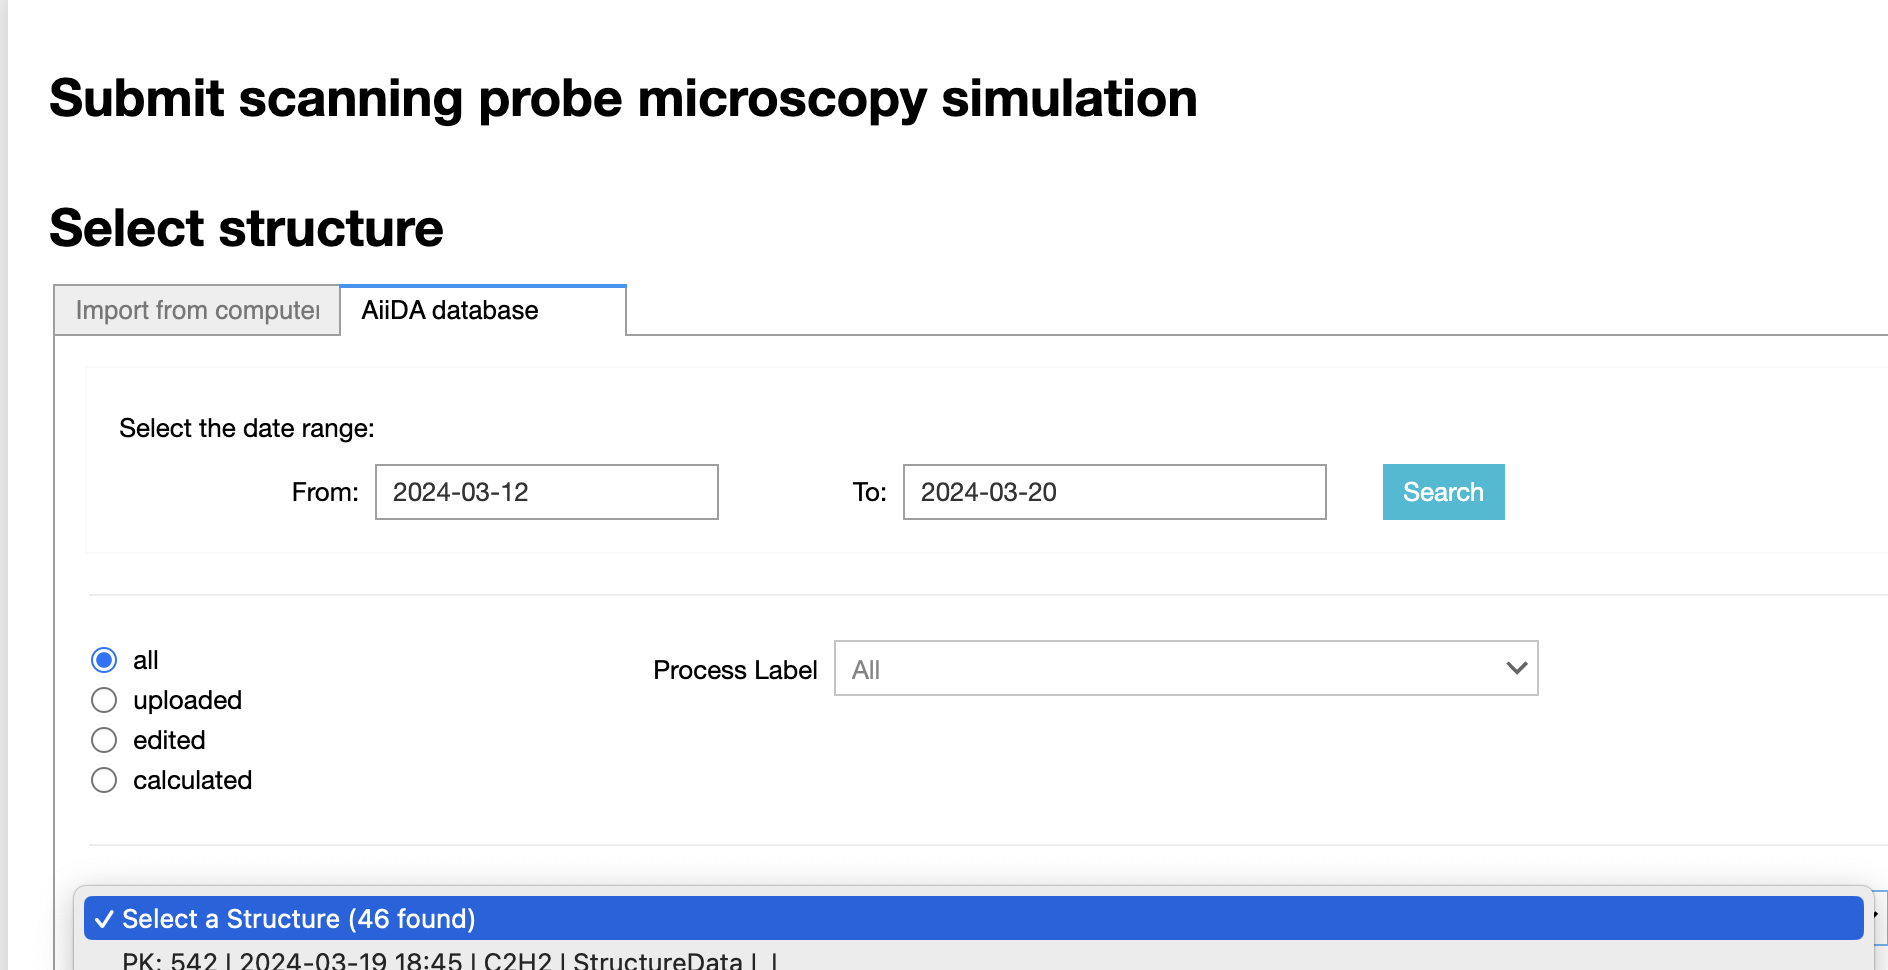

The important parameters are shown below.

**NOTE THAT THE NUMBER OF OCCUPIED AND UNOCCUPIED ORBITALS HAS TO BE ADAPTED. FOR CARBON, ONLY 4 ELECTRONS PER ATOM  (CORE ELECTRONS ARE IMPLICIT) ARE CONSIDERED. SO WE HAVE 4+4+1+1 ELECTRONS = 10 IN 5 OCCUPIED ORBITALS (SPIN UP AND SPIN DOWN. Modify the mask accordingly**

Then hit "SUBMIT"

With 

    verdi process list -a

you can check when the calculation of the orbitals is finished.
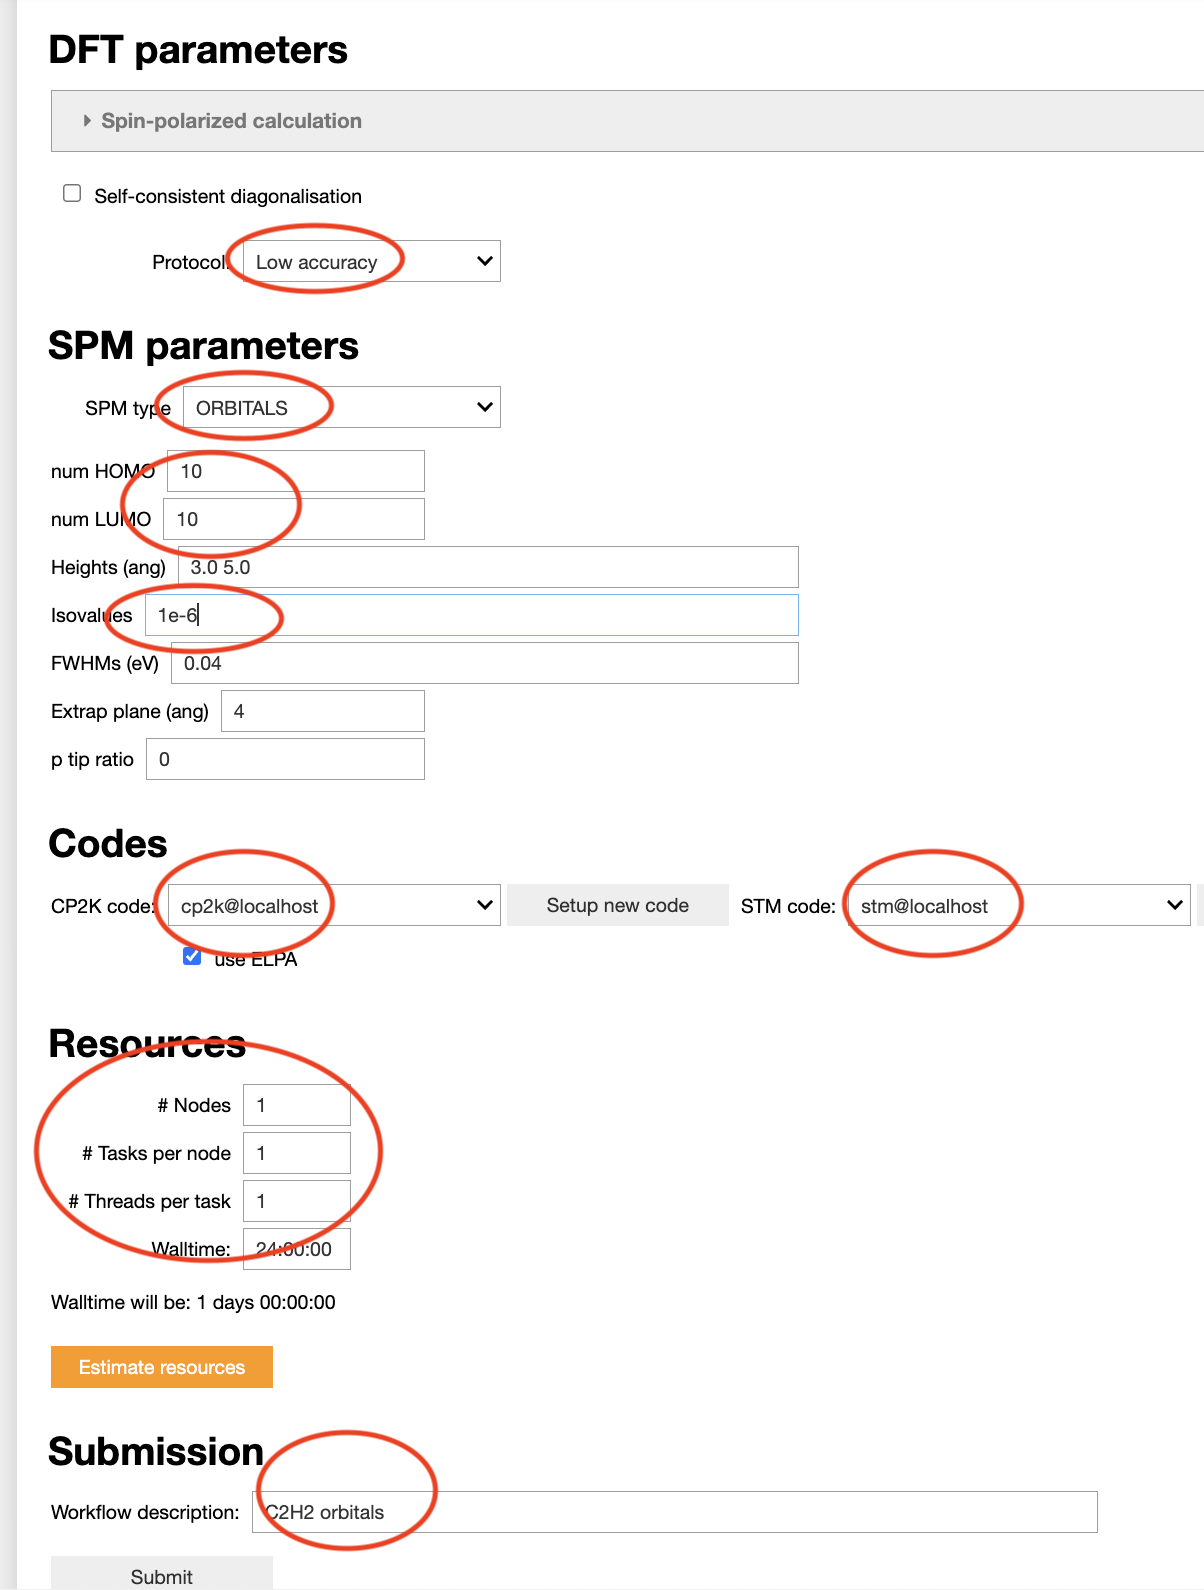



In [16]:
!verdi process list -a # THIS WILL GIVE THE PK OF THE STM CALCULATION. WHEN THIS IS FINISHED, MARK THE PK AND PUT IT IN THE NEXT CELL

  PK  Created    Process label                     ♻    Process State    Process status
----  ---------  --------------------------------  ---  ---------------  ----------------
  38  24m ago    Cp2kGeoOptWorkChain                    ⏹ Finished [0]
  46  24m ago    Cp2kBaseWorkChain                      ⏹ Finished [0]
  47  24m ago    Cp2kCalculation                        ⏹ Finished [0]
  53  16m ago    merge_trajectory_data_non_unique       ⏹ Finished [0]
  58  5m ago     Cp2kOrbitalsWorkChain                  ⏹ Finished [0]
  62  5m ago     Cp2kDiagWorkChain                      ⏹ Finished [0]
  69  5m ago     Cp2kBaseWorkChain                      ⏹ Finished [0]
  70  5m ago     Cp2kCalculation                        ⏹ Finished [0]
  78  4m ago     Cp2kBaseWorkChain                      ⏹ Finished [0]
  79  4m ago     Cp2kCalculation                        ⏹ Finished [0]
  84  4m ago     StmCalculation                         ⏹ Finished [0]

Total results: 11

Report: ♻ Processes m

In [19]:
my_stm_c2h2_pk = 84 # mark the pk of the StmCalculation
node_stm = load_node (my_stm_c2h2_pk)
node_orbital_pk_c2h2 = (node_stm.caller.pk)

print (my_geo_opt_pk," is the pk of the Geo Opt")
print (node_orbital_pk_c2h2," is the pk for C2H2 orbitals")

38  is the pk of the Geo Opt
58  is the pk for C2H2 orbitals


Once finished, we go to the **search** page of AiiDAlab and hit the "Orbitals" simulation, just finished. And we land on this page:

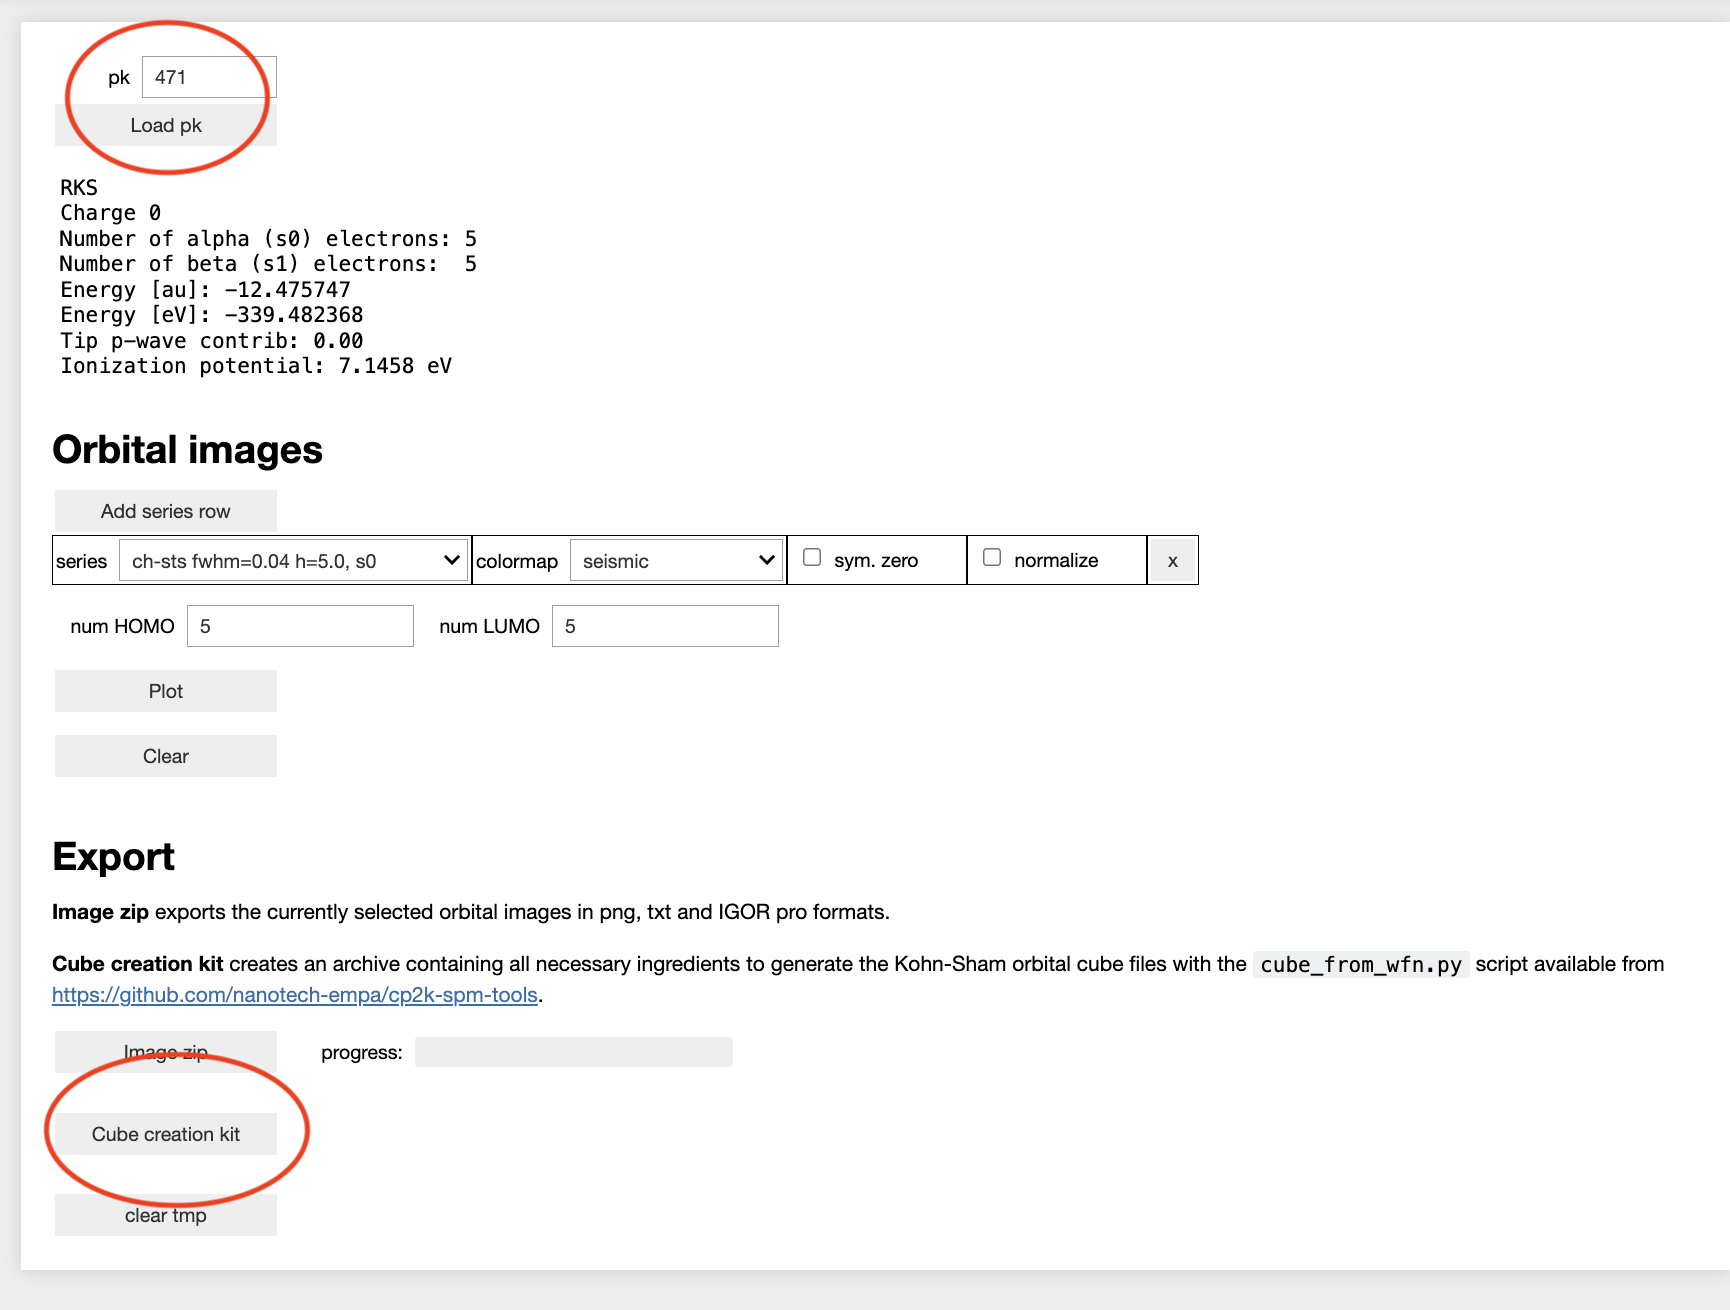

We can visualize STM images of the orbitals, but it is important to hit the button 

**Cube creation kit** 

which will generate a series of files that are important to create the orbitals grid files from the wavefunction in the **third notebook**.
Note also the 

**Pk number** of this job, we will need it in the third notebook, now in the variable ``node_orbital_pk_c2h2``
